## Convolutional Neural Networks

we train a CNN to classify images from the CIFAR-10 database



Load CIFAR10 --> built in in Keras

In [18]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping , ModelCheckpoint

In [2]:
# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**Data Visualization**

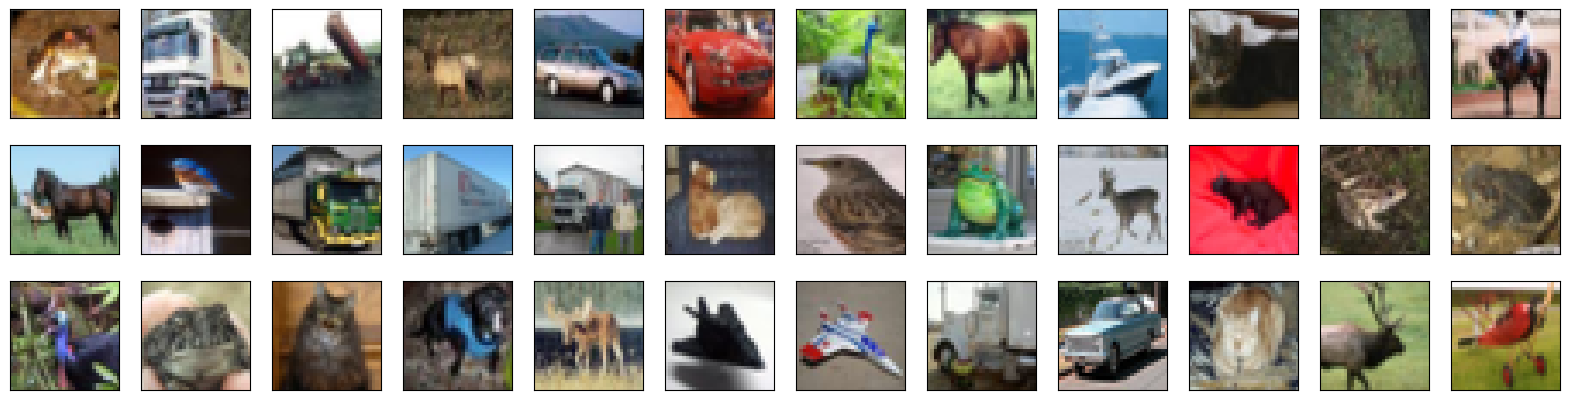

In [5]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

**Rescale the Images**

In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

**split the dataset**

In [8]:
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


**Built the model**

In [16]:
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,502 (2.02 MB)

 Trainable params: 528,278 (2.02 MB)

 Non-trainable params: 224 (896.00 B)

**Compile the model**

In [17]:
model2.compile(loss='categorical_crossentropy', optimizer='Adam',
                  metrics=['accuracy'])

**Train the Model**

In [19]:
checkpointer = ModelCheckpoint(filepath='model2.keras', verbose=1,
                               save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the model with both callbacks
hist = model2.fit(x_train, y_train, batch_size=32, epochs=100,
                 validation_data=(x_valid, y_valid),
                 callbacks=[checkpointer, early_stopping],
                 verbose=2, shuffle=True)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.16836, saving model to model2.keras
1407/1407 - 71s - 51ms/step - accuracy: 0.4611 - loss: 1.5317 - val_accuracy: 0.5834 - val_loss: 1.1684
Epoch 2/100

Epoch 2: val_loss improved from 1.16836 to 1.07486, saving model to model2.keras
1407/1407 - 70s - 50ms/step - accuracy: 0.5717 - loss: 1.1972 - val_accuracy: 0.6202 - val_loss: 1.0749
Epoch 3/100

Epoch 3: val_loss improved from 1.07486 to 0.99161, saving model to model2.keras
1407/1407 - 76s - 54ms/step - accuracy: 0.6199 - loss: 1.0675 - val_accuracy: 0.6528 - val_loss: 0.9916
Epoch 4/100

Epoch 4: val_loss improved from 0.99161 to 0.91852, saving model to model2.keras
1407/1407 - 81s - 58ms/step - accuracy: 0.6523 - loss: 0.9865 - val_accuracy: 0.6826 - val_loss: 0.9185
Epoch 5/100

Epoch 5: val_loss improved from 0.91852 to 0.90146, saving model to model2.keras
1407/1407 - 84s - 59ms/step - accuracy: 0.6775 - loss: 0.9174 - val_accuracy: 0.6964 - val_loss: 0.9015
Epoch 6/100

E

**Evaluate the Model**

In [20]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)

print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

313/313 - 4s - 14ms/step - accuracy: 0.7543 - loss: 0.7400
Test accuracy: 0.7542999982833862, Test loss: 0.7400246858596802


**Prediction**

In [21]:
y_hat = model2.predict(x_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


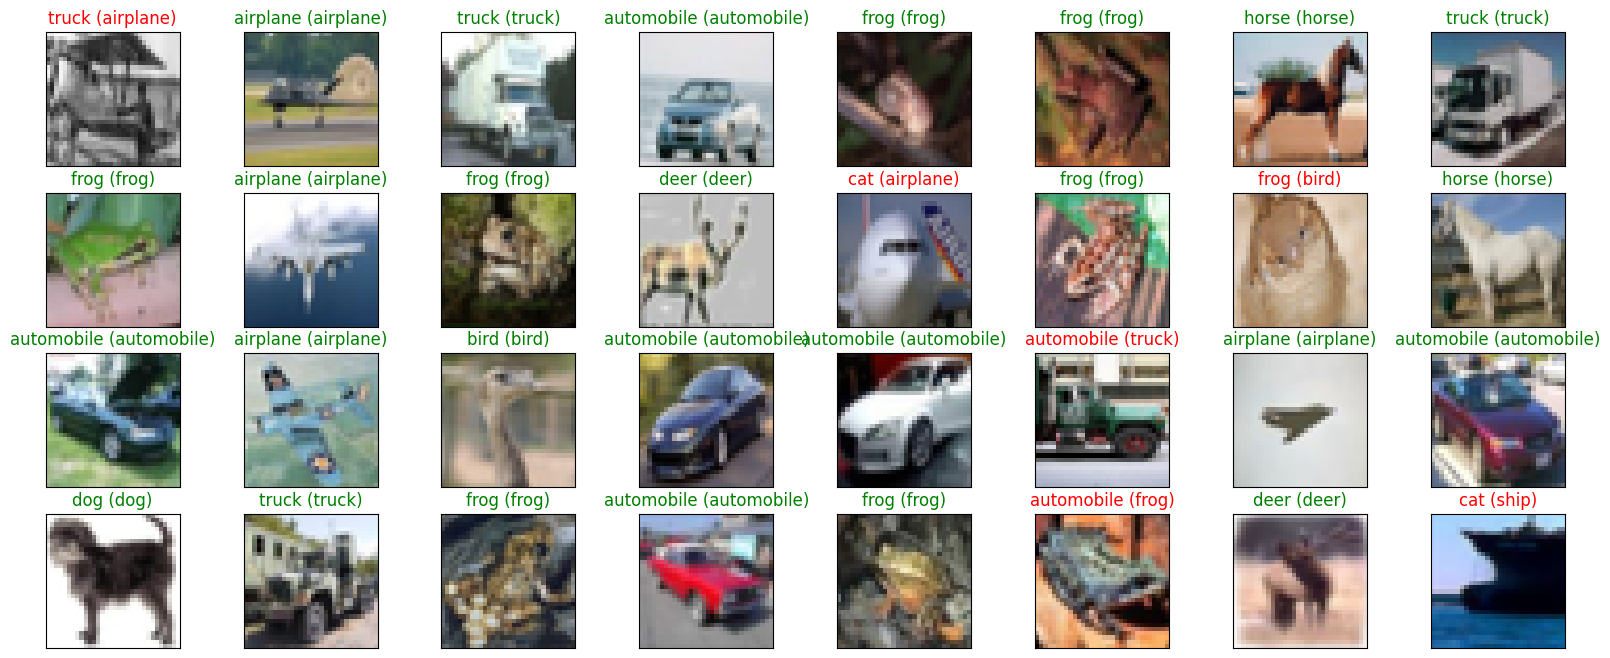

In [22]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))